In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
import itertools

directory = "C:/Users/Dylan/Documents/EdTechResearch/Obfuscated"

# Read each CSV file in dir "path/to/root_dir"
cols = ['Age','Gender','Birth_Country','Current_Country','First_Language','English_Fluency','Highest_Education','Number_Previous_OMSCS_Classes','Number_of_Online_Courses', 'Other_Courses_Same_Time']
i = 0
for file in Path(directory).glob("**/*soc.csv"):
    df = pd.read_csv(file)
    col_1 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('How old are you')]].values))
    col_2 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('What is your gender')]].values))
    col_3 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('In what country were you born')]].values))
    col_4 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('In what country do you presently live')]].values))
    col_5 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('What is your first or principal language')]].values))
    col_6 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('What is your fluency with English')]].values))
    col_7 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('What is the highest level of education have you attained')]].values))
    col_8 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('How many OMS classes have you completed prior to the start of this semester')]].values))
    col_9 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('Approximately how many online classes have you completed not including the OMSCS program')]].values))
    col_10 = list(itertools.chain.from_iterable(df[df.columns[df.columns.str.contains('how many other OMSCS classes are you taking this semester')]].values))
    output = [col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10]
    if i == 0:
        final_df = pd.DataFrame(np.transpose(output), columns=cols)
        i = i+1
    else:
        final_df = pd.concat([final_df,pd.DataFrame(np.transpose(output), columns=cols)],ignore_index=True)
# Put the dataframes to a single dataframe

final_df.shape

(12165, 10)

In [3]:
final_df.head()

,Age,Gender,Birth_Country,Current_Country,First_Language,English_Fluency,Highest_Education,Number_Previous_OMSCS_Classes,Number_of_Online_Courses,Other_Courses_Same_Time
0,25 to 34,Male,India,US,English,Fully fluent (non-native speaker),Bachelor's Degree,6.0,2-3,1
1,35 to 44,Female,United States,United States,English,Native speaker,Bachelor's Degree,7.0,10+,1
2,25 to 34,Female,Japan,US,English,Partially fluent,Bachelor's Degree,3.0,2-3,0
3,35 to 44,Male,"The United States of America (Lansing, Michigan)",USA,Tamil,Fully fluent (non-native speaker),Master's Degree,6.0,4-6,1
4,25 to 34,Male,Mars,USA,English,Native speaker,Bachelor's Degree,2.0,2-3,1


In [2]:
# Elbow curve to find optimal K
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
cost = []
K = range(1,100)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5)
    kmode.fit_predict(final_df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

NameError: name 'final_df' is not defined

In [517]:
validation = pd.read_csv('edtech_validation_survey.csv',index_col=0)
validation.head()

,age,birth_country,current_country,language,degree,current_industry,job_title,industry_switch,desired_career_title,num_omscs_taken,courses_taken,non_omscs_courses,course_same_time,email
response,,,,,,,,,,,,,,
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,NaN,4.0,"CS6350,CS6200,CS6601",2-3,1.0,NaN
2.0,30 - 39,USA,USA,Hindi,Bachelor's Degree,Technology,software_engineer,Technology,NaN,1.0,CS6601,2-3,1.0,NaN
3.0,18 - 29,China,China,Chinese,Master's Degree,Other,graduated student,Technology,CEO,1.0,CS6460,1,2.0,gliu359@gatech.edu
4.0,30 - 39,India,USA,Hindi,Bachelor's Degree,Engineering,manager,Engineering,Director,4.0,"CS6750,CS6460",10,0.0,NaN
5.0,18 - 29,USA,USA,English,Bachelor's Degree,Engineering,Data Analyst,Engineering,NaN,2.0,"CS6750,C6300",2-3,1.0,NaN


In [518]:
course_metadata = pd.read_csv('edtech_course_metadata.csv')
validation['courses_taken'] = validation['courses_taken'].str.split(',')
course_survey_exploded = validation.explode('courses_taken')
course_survey_exploded.head()

,age,birth_country,current_country,language,degree,current_industry,job_title,industry_switch,desired_career_title,num_omscs_taken,courses_taken,non_omscs_courses,course_same_time,email
response,,,,,,,,,,,,,,
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,NaN,4.0,CS6350,2-3,1.0,NaN
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,NaN,4.0,CS6200,2-3,1.0,NaN
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,NaN,4.0,CS6601,2-3,1.0,NaN
2.0,30 - 39,USA,USA,Hindi,Bachelor's Degree,Technology,software_engineer,Technology,NaN,1.0,CS6601,2-3,1.0,NaN
3.0,18 - 29,China,China,Chinese,Master's Degree,Other,graduated student,Technology,CEO,1.0,CS6460,1,2.0,gliu359@gatech.edu


In [531]:
# Elbow curve to find optimal K
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
cost = []
K = range(1,11)
X_model = validation.drop(['email','courses_taken'],axis=1).copy(deep=True).fillna('none').iloc[:-1]
X_model


,age,birth_country,current_country,language,degree,current_industry,job_title,industry_switch,desired_career_title,num_omscs_taken,non_omscs_courses,course_same_time
response,,,,,,,,,,,,
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,none,4.0,2-3,1.0
2.0,30 - 39,USA,USA,Hindi,Bachelor's Degree,Technology,software_engineer,Technology,none,1.0,2-3,1.0
3.0,18 - 29,China,China,Chinese,Master's Degree,Other,graduated student,Technology,CEO,1.0,1,2.0
4.0,30 - 39,India,USA,Hindi,Bachelor's Degree,Engineering,manager,Engineering,Director,4.0,10,0.0
5.0,18 - 29,USA,USA,English,Bachelor's Degree,Engineering,Data Analyst,Engineering,none,2.0,2-3,1.0
6.0,50 - 64,USA,USA,English,Bachelor's Degree,Other,Automotive Technician,Finance,none,2.0,10,0.0
7.0,30 - 39,China,USA,Chinese,Master's Degree,Education,Information Systems Manager,Engineering,AI Software Developer,8.0,8-9,1.0
8.0,40 - 49,USA,USA,English,Bachelor's Degree,Technology,AI & Machine Learning Engineer,Education,none,8.0,10,1.0
9.0,18 - 29,USA,USA,English,Bachelor's Degree,Technology,software_engineer,Technology,Software Architect,9.0,10,1.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 512.8358083577564
Init: initial

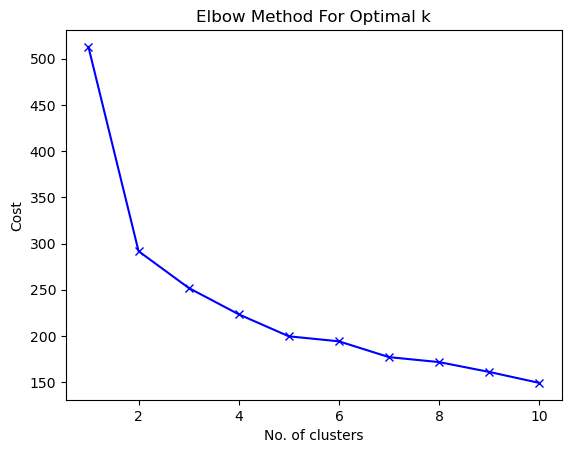

In [532]:
for num_clusters in list(K):
    kprototypes = KPrototypes(n_clusters=num_clusters, init='random',verbose=1)
    kprototypes.fit_predict(X_model.values,categorical=[0,1,2,3,4,5,6,7,8,10,11])
    cost.append(kprototypes.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [547]:
kprototypes = KPrototypes(n_clusters=5, init='random',verbose=0)
X_model = validation.drop(['email','courses_taken'],axis=1).copy(deep=True).fillna('none').iloc[:-1]
X_model['user_cluster']= kprototypes.fit_predict(X_model.values,categorical=[0,1,2,3,4,5,6,7,8,10,11])+1
X_model['courses_taken'] = validation['courses_taken']
X_model = X_model.explode('courses_taken')
X_model

,age,birth_country,current_country,language,degree,current_industry,job_title,industry_switch,desired_career_title,num_omscs_taken,non_omscs_courses,course_same_time,user_cluster,courses_taken
response,,,,,,,,,,,,,,
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,none,4.0,2-3,1.0,3,CS6350
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,none,4.0,2-3,1.0,3,CS6200
1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,none,4.0,2-3,1.0,3,CS6601
2.0,30 - 39,USA,USA,Hindi,Bachelor's Degree,Technology,software_engineer,Technology,none,1.0,2-3,1.0,5,CS6601
3.0,18 - 29,China,China,Chinese,Master's Degree,Other,graduated student,Technology,CEO,1.0,1,2.0,4,CS6460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,10.0,10,2.0,2,CS7638
27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,10.0,10,2.0,2,CS6601
27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,10.0,10,2.0,2,CS7643


In [550]:
X_user = X_model.reset_index()
X_user=X_user.rename(columns={'courses_taken':'course_code'})
X_user.head()
X_metadata = pd.merge(X_user,course_metadata,on='course_code')
X_metadata.sort_values('response')

,response,age,birth_country,current_country,language,degree,current_industry,job_title,industry_switch,desired_career_title,...,course_same_time,user_cluster,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme
0,1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,none,...,1.0,3,CS6200,graduate_introduction_to_operating_systems,4.35,3.67,18.38,True,computing_systems,operating_systems
3,1.0,30 - 39,China,singapore,English,Bachelor's Degree,Technology,software_engineer,Technology,none,...,1.0,3,CS6601,artificial_intelligence,4.13,4.07,22.88,True,robotics,data_science
4,2.0,30 - 39,USA,USA,Hindi,Bachelor's Degree,Technology,software_engineer,Technology,none,...,1.0,5,CS6601,artificial_intelligence,4.13,4.07,22.88,True,robotics,data_science
12,3.0,18 - 29,China,China,Chinese,Master's Degree,Other,graduated student,Technology,CEO,...,2.0,4,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education
21,4.0,30 - 39,India,USA,Hindi,Bachelor's Degree,Engineering,manager,Engineering,Director,...,0.0,3,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,...,2.0,2,CS6475,computational_photography,3.59,3.23,16.86,True,robotics,data_science
72,27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,...,2.0,2,CS6603,ai_ethics_and_society,2.48,1.61,5.97,True,machine_learning,data_science
48,27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,...,2.0,2,CS7638,artificial_intelligence_for_robotics,3.92,3.01,12.63,True,robotics,data_science
11,27.0,30 - 39,USA,USA,English,Bachelor's Degree,Rail industry,Computer Vision Engineer,Technology,Research Scientist,...,2.0,2,CS6601,artificial_intelligence,4.13,4.07,22.88,True,robotics,data_science


In [ ]:
X_with_data = X_metadata
kprototypes = KPrototypes(n_clusters=3, init='random',verbose=1)
X_with_data['Predicted']= kprototypes.fit_predict(X_model.values,categorical=[0,1,2,6,7,8])
X_with_data['Predicted']

In [ ]:
X_metadata = pd.merge(X_user,course_metadata,on='course_code')
#X_metadata = X_metadata[X_metadata.course_code != 'CS6460']
X_metadata.sort_values('response')

In [3]:
course_survey_basic = pd.read_csv('edtech_first_survey_processed.csv',index_col=0)
course_metadata = pd.read_csv('edtech_course_metadata.csv')
course_survey_basic['Q3'] = course_survey_basic['Q3'].str.split(',')
course_survey_exploded = course_survey_basic.explode('Q3')
course_survey_exploded.head()

,Q3,Q4
response,,
1,CS6460,CS6200
1,CS6750,CS6200
1,CS6603,CS6200
2,CS6460,CS7643
2,CS6601,CS7643


In [33]:
course_metadata

,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme
0,CS6035,introduction_to_information_security,3.46,2.53,10.38,True,computing_systems,security
1,CS6200,graduate_introduction_to_operating_systems,4.35,3.67,18.38,True,computing_systems,operating_systems
2,CS6242,data_and_visual_analytics,2.98,3.23,16.11,True,machine_learning,data_science
3,CS6250,computer_networks,3.51,2.44,8.89,True,computing_systems,computer_systems
4,CS6262,network_security,3.21,3.02,12.85,True,computing_systems,security
5,CS6300,software_development_process,3.61,3.10,13.95,True,interative_intelligence,software_engineering
6,CS6310,software_architecture_and_design,3.07,2.60,11.60,True,computing_systems,software_engineering
7,CS6340,advanced_topics_in_software_analysis_and_testing,3.54,3.22,12.61,True,computing_systems,software_engineering
8,CS6400,database_systems_concepts_and_design,2.58,2.83,11.24,True,computing_systems,databases
9,CS6440,introduction_to_health_informatics,2.57,2.26,10.16,True,human_computer_interaction,data_science


In [265]:
X_user = course_survey_exploded.iloc[:,:1].reset_index()
X_user=X_user.rename(columns={'Q3':'course_code'})
X_user.head()
X_metadata = pd.merge(X_user,course_metadata,on='course_code')
#X_metadata = X_metadata[X_metadata.course_code != 'CS6460']
X_metadata.sort_values('response')

,response,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme
0,1,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education
41,1,CS6603,ai_ethics_and_society,2.48,1.61,5.97,True,machine_learning,data_science
21,1,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design
96,2,CS6300,software_development_process,3.61,3.10,13.95,True,interative_intelligence,software_engineering
93,2,CS6340,advanced_topics_in_software_analysis_and_testing,3.54,3.22,12.61,True,computing_systems,software_engineering
...,...,...,...,...,...,...,...,...,...
115,48,CS7637,knowledge_based_ai,3.68,3.10,13.95,True,interative_inteligence,user_design
68,48,CS7638,artificial_intelligence_for_robotics,3.92,3.01,12.63,True,robotics,data_science
139,48,CS6250,computer_networks,3.51,2.44,8.89,True,computing_systems,computer_systems
40,52,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design


In [423]:
X_model = X_metadata
X_model

,response,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme,Predicted,num_courses,taken_course
0,1,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,5,3,1
1,2,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,3,10,1
2,9,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,5,5,1
3,11,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,5,2,1
4,13,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
160,41,CS6242,data_and_visual_analytics,2.98,3.23,16.11,True,machine_learning,data_science,3,9,1
161,46,CS6242,data_and_visual_analytics,2.98,3.23,16.11,True,machine_learning,data_science,5,2,1
162,47,CS6242,data_and_visual_analytics,2.98,3.23,16.11,True,machine_learning,data_science,3,9,1
163,40,CS6150,computing_for_good,2.50,2.00,8.50,False,free_elective,data_science,4,8,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 3988.544282257716
Init: initial

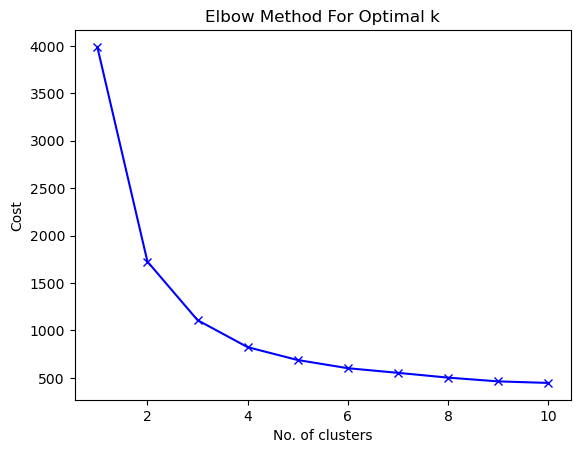

In [6]:
# Elbow curve to find optimal K
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
cost = []
K = range(1,11)
for num_clusters in list(K):
    kprototypes = KPrototypes(n_clusters=num_clusters, init='random',verbose=1)
    kprototypes.fit_predict(X_model.values,categorical=[0,1,2,6,7,8])
    cost.append(kprototypes.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [449]:
X_with_data = X_model
kprototypes = KPrototypes(n_clusters=3, init='random',verbose=1)
X_with_data['Predicted']= kprototypes.fit_predict(X_model.values,categorical=[0,1,2,6,7,8])
X_with_data['Predicted']

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18, ncost: 2206.5591992643467
Run: 1, iteration: 2/100, moves: 11, ncost: 2189.680615162952
Run: 1, iteration: 3/100, moves: 1, ncost: 2189.485031242611
Run: 1, iteration: 4/100, moves: 0, ncost: 2189.485031242611
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9, ncost: 2412.7895069687775
Run: 2, iteration: 2/100, moves: 8, ncost: 2373.317230210995
Run: 2, iteration: 3/100, moves: 22, ncost: 2262.8875536802734
Run: 2, iteration: 4/100, moves: 13, ncost: 2194.600024668001
Run: 2, iteration: 5/100, moves: 3, ncost: 2188.926643907229
Run: 2, iteration: 6/100, moves: 0, ncost: 2188.926643907229
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 35, ncost: 2176.6269438792283
Run: 3, iteration: 2/100, moves: 8, ncost: 2127.92071500359
Run: 3, iteration: 3

0      2
1      1
2      2
3      2
4      2
      ..
160    1
161    2
162    1
163    1
164    1
Name: Predicted, Length: 165, dtype: uint16

In [450]:
X_with_data['Predicted']=X_with_data['Predicted']+1

In [451]:
group1 = X_with_data[X_with_data['Predicted']==1][['course_code','course_name']]
group1['course_name'].unique()

array(['artificial_intelligence', 'computational_photography',
       'graduate_introduction_to_operating_systems',
       'big_data_analytics_for_healthcare',
       'reinforcement_learning_and_decision_making', 'deep_learning',
       'introduction_to_graduate_algorithms', 'machine_learning'],
      dtype=object)

In [452]:
group2 = X_with_data[X_with_data['Predicted']==2][['course_code','course_name']]
group2['course_name'].unique()

array(['educational_technology', 'human_computer_interaction',
       'ai_ethics_and_society', 'artificial_intelligence_for_robotics',
       'computational_photography', 'machine_learning_for_trading',
       'game_ai', 'network_science',
       'advanced_topics_in_software_analysis_and_testing',
       'software_development_process', 'knowledge_based_ai',
       'software_architecture_and_design',
       'database_systems_concepts_and_design',
       'introduction_to_information_security',
       'introduction_to_health_informatics', 'computer_networks',
       'digital_marketing', 'data_and_visual_analytics',
       'computing_for_good', 'data_analytics_and_security'], dtype=object)

In [453]:
group3 = X_with_data[X_with_data['Predicted']==3][['course_code','course_name']]
group3['course_name'].unique()

array(['educational_technology', 'human_computer_interaction',
       'ai_ethics_and_society', 'artificial_intelligence_for_robotics',
       'machine_learning_for_trading', 'game_ai',
       'advanced_topics_in_software_analysis_and_testing',
       'software_development_process', 'knowledge_based_ai',
       'software_architecture_and_design',
       'database_systems_concepts_and_design',
       'introduction_to_information_security',
       'introduction_to_health_informatics', 'computer_networks',
       'data_and_visual_analytics'], dtype=object)

In [454]:
group4 = X_with_data[X_with_data['Predicted']==4][['course_code','course_name']]
group4['course_name'].unique()

array([], dtype=object)

In [455]:
group5 = X_with_data[X_with_data['Predicted']==5][['course_code','course_name']]
group5['course_name'].unique()

array([], dtype=object)

In [456]:
X_with_data.groupby('Predicted').mean()

,response,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,num_courses,taken_course
Predicted,,,,,,,
1,24.548387,3.866129,4.017742,21.337742,1.000000,7.161290,1.0
2,23.488636,3.567955,2.668523,11.884432,0.954545,8.011364,1.0
3,24.717391,3.761739,2.691522,12.384348,1.000000,3.217391,1.0


In [457]:
X_with_data.sort_values('response')

,response,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme,Predicted,num_courses,taken_course
0,1,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,3,3,1
41,1,CS6603,ai_ethics_and_society,2.48,1.61,5.97,True,machine_learning,data_science,3,3,1
21,1,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design,3,3,1
96,2,CS6300,software_development_process,3.61,3.10,13.95,True,interative_intelligence,software_engineering,2,10,1
93,2,CS6340,advanced_topics_in_software_analysis_and_testing,3.54,3.22,12.61,True,computing_systems,software_engineering,2,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115,48,CS7637,knowledge_based_ai,3.68,3.10,13.95,True,interative_inteligence,user_design,3,3,1
68,48,CS7638,artificial_intelligence_for_robotics,3.92,3.01,12.63,True,robotics,data_science,3,3,1
139,48,CS6250,computer_networks,3.51,2.44,8.89,True,computing_systems,computer_systems,3,3,1
40,52,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design,3,2,1


In [458]:
X_with_data['num_courses']=X_with_data['Predicted'].groupby(X_with_data['response']).transform('count')
X_with_data.sort_values('response')

,response,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme,Predicted,num_courses,taken_course
0,1,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,3,3,1
41,1,CS6603,ai_ethics_and_society,2.48,1.61,5.97,True,machine_learning,data_science,3,3,1
21,1,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design,3,3,1
96,2,CS6300,software_development_process,3.61,3.10,13.95,True,interative_intelligence,software_engineering,2,10,1
93,2,CS6340,advanced_topics_in_software_analysis_and_testing,3.54,3.22,12.61,True,computing_systems,software_engineering,2,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115,48,CS7637,knowledge_based_ai,3.68,3.10,13.95,True,interative_inteligence,user_design,3,3,1
68,48,CS7638,artificial_intelligence_for_robotics,3.92,3.01,12.63,True,robotics,data_science,3,3,1
139,48,CS6250,computer_networks,3.51,2.44,8.89,True,computing_systems,computer_systems,3,3,1
40,52,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design,3,2,1


In [459]:
X_agg = X_with_data.copy(deep=True)
X_agg ['score1'] = X_agg[X_agg ['Predicted'].eq(1)].groupby(['response'])['Predicted'].transform('count')
X_agg ['score2'] = X_agg [X_agg ['Predicted'].eq(2)].groupby(['response'])['Predicted'].transform('count')
X_agg ['score3'] = X_agg [X_agg ['Predicted'].eq(3)].groupby(['response'])['Predicted'].transform('count')
X_agg ['average_pred'] = X_agg.groupby(['response'])['Predicted'].transform('mean')
X_agg=X_agg.fillna(0).groupby(['response','num_courses']).max().reset_index()
X_agg

,response,num_courses,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme,Predicted,taken_course,score1,score2,score3,average_pred
0,1,3,CS6750,human_computer_interaction,4.08,2.85,14.27,True,machine_learning,user_design,3,1,0.0,0.0,3.0,3.000000
1,2,10,CS7646,software_development_process,4.50,4.07,22.88,True,robotics,software_engineering,2,1,2.0,8.0,0.0,1.800000
2,4,6,CS7637,software_development_process,4.13,4.07,22.88,True,robotics,user_design,2,1,1.0,5.0,0.0,1.833333
3,8,6,CS6440,software_development_process,3.61,3.10,13.95,True,interative_intelligence,software_engineering,2,1,0.0,6.0,0.0,2.000000
4,9,5,CS7646,machine_learning_for_trading,4.13,4.07,22.88,True,robotics,education,3,1,1.0,1.0,3.0,2.400000
5,10,1,CS6750,human_computer_interaction,4.08,2.51,12.01,True,human_computer_interaction,user_design,3,1,0.0,0.0,1.0,3.000000
6,11,2,CS6460,educational_technology,4.00,2.85,14.27,True,human_computer_interaction,education,3,1,0.0,0.0,2.0,3.000000
7,12,8,CSE6250,software_development_process,4.04,4.27,28.96,True,machine_learning,software_engineering,2,1,4.0,4.0,0.0,1.500000
8,13,4,CS6460,software_architecture_and_design,4.00,3.22,14.27,True,human_computer_interaction,software_engineering,3,1,0.0,0.0,4.0,3.000000
9,14,3,CS7646,machine_learning_for_trading,4.08,2.85,14.27,True,machine_learning,user_design,3,1,0.0,0.0,3.0,3.000000


In [460]:
X_peer_match = X_agg[['response','num_courses','score1','score2','score3','average_pred']]
X_peer_match.sort_values('response')

,response,num_courses,score1,score2,score3,average_pred
0,1,3,0.0,0.0,3.0,3.000000
1,2,10,2.0,8.0,0.0,1.800000
2,4,6,1.0,5.0,0.0,1.833333
3,8,6,0.0,6.0,0.0,2.000000
4,9,5,1.0,1.0,3.0,2.400000
5,10,1,0.0,0.0,1.0,3.000000
6,11,2,0.0,0.0,2.0,3.000000
7,12,8,4.0,4.0,0.0,1.500000
8,13,4,0.0,0.0,4.0,3.000000
9,14,3,0.0,0.0,3.0,3.000000


In [461]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

model = NMF(n_components=len(X_peer_match)//5, random_state=0)
nmf_features = model.fit_transform(X_peer_match.set_index('response'))
normalized = normalize(nmf_features)
df = pd.DataFrame(data=normalized, index=X_peer_match["response"])
df

,0,1,2,3,4,5
response,,,,,,
1,0.000000,0.000000,0.000000,0.382702,0.807436,0.448983
2,0.684615,0.687545,0.212409,0.000000,0.116048,0.000018
4,0.599635,0.615340,0.295957,0.000000,0.417376,0.000020
8,0.768191,0.000041,0.356853,0.000000,0.531543,0.000019
9,0.277076,0.719479,0.021197,0.203606,0.462552,0.386935
10,0.000003,0.000003,0.000000,0.903220,0.429170,0.002523
11,0.000000,0.000000,0.000000,0.644026,0.708049,0.289648
12,0.207964,0.973358,0.087226,0.000000,0.041447,0.000009
13,0.000000,0.000000,0.000000,0.205508,0.827225,0.522939


In [502]:
similarities = df.dot(df.loc[4])
sims = pd.DataFrame(similarities.nlargest(5))
sims = sims.merge(X_peer_match[['response','num_courses','score1','score2','score3']], how='inner', on="response")
sims.set_index("response", drop=True, inplace=True)
sims.sort_values(by="num_courses", ascending=False).head()

,0,num_courses,score1,score2,score3
response,,,,,
2,0.944893,10,2.0,8.0,0.0
47,0.950827,9,2.0,7.0,0.0
19,0.936770,9,1.0,8.0,0.0
40,0.947281,8,2.0,6.0,0.0
4,1.000000,6,1.0,5.0,0.0


In [508]:
matches = []
for i in range(0,len(df)):
    similarities = df.dot(df.iloc[i])
    sims = pd.DataFrame(similarities.nlargest(5))
    matches.append(list(sims.index))
X_peer_match['matches'] = matches    
X_peer_match

C:\Users\Dylan\AppData\Local\Temp\ipykernel_23512\3150862331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_peer_match['matches'] = matches


,response,num_courses,score1,score2,score3,average_pred,matches
0,1,3,0.0,0.0,3.0,3.000000,"[1, 27, 14, 48, 22]"
1,2,10,2.0,8.0,0.0,1.800000,"[2, 47, 40, 41, 19]"
2,4,6,1.0,5.0,0.0,1.833333,"[4, 47, 40, 2, 19]"
3,8,6,0.0,6.0,0.0,2.000000,"[8, 44, 17, 19, 16]"
4,9,5,1.0,1.0,3.0,2.400000,"[9, 31, 15, 52, 24]"
5,10,1,0.0,0.0,1.0,3.000000,"[10, 38, 21, 45, 11]"
6,11,2,0.0,0.0,2.0,3.000000,"[11, 32, 33, 42, 46]"
7,12,8,4.0,4.0,0.0,1.500000,"[12, 18, 34, 37, 24]"
8,13,4,0.0,0.0,4.0,3.000000,"[13, 22, 14, 27, 1]"
9,14,3,0.0,0.0,3.0,3.000000,"[14, 27, 1, 48, 22]"


In [442]:
X_with_data['taken_course'] = 1

In [465]:
pivoted = X_with_data.pivot_table(index = 'response', columns ='course_code', values = 'Predicted',aggfunc='mean').fillna(0)
pivoted

course_code,CS6035,CS6150,CS6200,CS6242,CS6250,CS6300,CS6310,CS6340,CS6400,CS6440,...,CS7632,CS7637,CS7638,CS7641,CS7642,CS7643,CS7646,CSE6250,INTA6450,MGT6311
response,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0
13,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


course_code,CS6035,CS6150,CS6200,CS6242,CS6250,CS6300,CS6310,CS6340,CS6400,CS6440,...,CS7632,CS7637,CS7638,CS7641,CS7642,CS7643,CS7646,CSE6250,INTA6450,MGT6311
response,,,,,,,,,,,,,,,,,,,,,
1,0.583306,0.337836,0.308200,1.204398,0.462737,0.828003,0.787697,0.430314,0.720180,0.695936,...,0.445362,0.857648,0.173385,0.587393,0.390673,0.464577,1.413860,0.343759,0.337836,0.547402
2,1.245215,0.818572,0.923160,0.792068,1.121097,2.206956,0.646352,1.109146,0.820626,0.553663,...,1.788464,1.257980,3.164625,0.838142,0.774010,0.842240,2.637599,0.728556,0.818572,0.685829
4,1.160066,0.443373,0.411585,0.539868,0.535010,1.005709,1.390967,0.815392,0.926193,0.954406,...,0.475126,0.716134,0.207441,0.451168,0.411365,0.437992,0.181923,0.380670,0.443373,0.711934
8,1.679288,0.531489,0.518290,-0.051199,0.640250,1.357131,1.812531,1.169584,1.067047,1.092334,...,0.663750,0.646773,0.658105,0.332519,0.420483,0.416058,-0.554728,0.398162,0.531489,0.808821
9,0.500838,0.554743,0.656086,1.058893,0.838986,1.679126,-0.096894,0.564897,0.412238,0.128507,...,1.484168,1.086442,2.771714,0.741777,0.578964,0.670207,3.189521,0.530924,0.554743,0.351693
10,0.072072,0.071029,0.025361,0.654250,0.067787,-0.009607,0.353488,0.029596,0.293946,0.347021,...,-0.118087,0.284185,-0.650145,0.233113,0.120714,0.150329,0.326874,0.103449,0.071029,0.228717
11,0.969094,0.293008,0.300439,0.175541,0.425324,1.040639,0.960825,0.670340,0.623287,0.581107,...,0.557310,0.529762,0.758202,0.249314,0.241720,0.266484,0.317776,0.213569,0.293008,0.441386
12,0.180004,0.470565,0.514908,0.921083,0.578225,0.795763,-0.092702,0.322121,0.310267,0.178633,...,0.849940,0.722194,1.382391,0.626332,0.514356,0.562187,1.991783,0.494646,0.470565,0.332716
13,2.229918,0.583991,0.577420,-0.145465,0.783056,1.937172,2.349219,1.502513,1.347654,1.344792,...,0.902405,0.842372,1.055276,0.334925,0.430620,0.439662,-0.571670,0.390239,0.583991,0.962617


In [478]:
def recommend_course(predictions_df, response_number, courses_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[response_number].sort_values(ascending=False)
    taken = courses_df[courses_df['response']==response_number]['course_code']
    recs = sorted_user_predictions.loc[~sorted_user_predictions.index.isin(taken.values)].iloc[:num_recommendations]
    return taken, recs

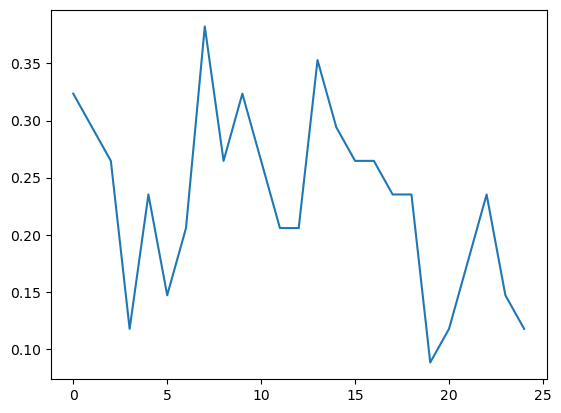

In [494]:
from scipy.sparse.linalg import svds
R = pivoted.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
accuracy = []
for ki in range(1,26):
    U, sigma, Vt = svds(pivoted, k = ki)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
    preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivoted.columns)
    preds_df['response'] = pivoted.index
    preds_df = preds_df.set_index('response')
    preds = []
    taken = []
    next = []
    category = []
    wanted_in_rec = []
    for response in preds_df.index:
        already_taken, predictions = recommend_course(preds_df, response,X_with_data)
        preds.append(list(predictions.index))
        cat = []
        for pred in list(predictions.index):
            if pred in group1['course_code'].unique():
                cat.append(1)
            elif pred in group2['course_code'].unique():
                cat.append(2)
            else:
                cat.append(3)
        category.append(cat)
        taken.append(list(already_taken))
        next.append(course_survey_exploded.groupby('response').max().loc[response]['Q4'])
        if course_survey_exploded.groupby('response').max().loc[response]['Q4'] in list(predictions.index):
            wanted_in_rec.append(True)
        else:
            wanted_in_rec.append(False)
    X_full = X_agg.copy(deep=True)
    X_full['taken_courses'] = taken
    X_full['recommended_courses'] = preds
    X_full['next_wanted_course'] = next
    X_full['category_recommended'] = category

    cat = []
    for i in range(0,len(X_full)):
        pred = X_full['next_wanted_course'].iloc[i]
        if pred in group1['course_code'].unique():
            cat.append(1)
        elif pred in group2['course_code'].unique():
            cat.append(2)
        else:
            cat.append(3)
    X_full['category_wanted'] = cat
    X_full['predicted_in_next'] = wanted_in_rec
    accuracy.append(X_full['predicted_in_next'].value_counts().loc[True]/len(X_full))

plt.plot(accuracy)



In [490]:
X_full['predicted_in_next'].value_counts().loc[True]

11

In [495]:
R = pivoted.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(pivoted, k = 7)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivoted.columns)
preds_df['response'] = pivoted.index
preds_df = preds_df.set_index('response')
preds = []
taken = []
next = []
category = []
wanted_in_rec = []
for response in preds_df.index:
    already_taken, predictions = recommend_course(preds_df, response,X_with_data)
    preds.append(list(predictions.index))
    cat = []
    for pred in list(predictions.index):
        if pred in group1['course_code'].unique():
            cat.append(1)
        elif pred in group2['course_code'].unique():
            cat.append(2)
        else:
            cat.append(3)
    category.append(cat)
    taken.append(list(already_taken))
    next.append(course_survey_exploded.groupby('response').max().loc[response]['Q4'])
    if course_survey_exploded.groupby('response').max().loc[response]['Q4'] in list(predictions.index):
        wanted_in_rec.append(True)
    else:
        wanted_in_rec.append(False)
X_full = X_agg.copy(deep=True)
X_full['taken_courses'] = taken
X_full['recommended_courses'] = preds
X_full['next_wanted_course'] = next
X_full['category_recommended'] = category

cat = []
for i in range(0,len(X_full)):
    pred = X_full['next_wanted_course'].iloc[i]
    if pred in group1['course_code'].unique():
        cat.append(1)
    elif pred in group2['course_code'].unique():
        cat.append(2)
    else:
        cat.append(3)
X_full['category_wanted'] = cat
X_full['predicted_in_next'] = wanted_in_rec



In [496]:
X_full.head()

,response,num_courses,course_code,course_name,omscentral_rating,omscentral_difficulty,omscentral_workload,foundational,omscs_theme,computer_science_theme,...,score1,score2,score3,average_pred,taken_courses,recommended_courses,next_wanted_course,category_recommended,category_wanted,predicted_in_next
0,1,3,CS6750,human_computer_interaction,4.08,2.85,14.27,True,machine_learning,user_design,...,0.0,0.0,3.0,3.000000,"[CS6460, CS6750, CS6603]","[CS6440, CS6400, MGT6311, CS7638, CS7641]",CS6200,"[2, 2, 2, 2, 1]",1,False
1,2,10,CS7646,software_development_process,4.50,4.07,22.88,True,robotics,software_engineering,...,2.0,8.0,0.0,1.800000,"[CS6460, CS6601, CS7638, CS6475, CS7646, CS763...","[CS6035, CS6250, CS7637, CS6515, CS7643]",CS7643,"[2, 2, 2, 1, 1]",1,True
2,4,6,CS7637,software_development_process,4.13,4.07,22.88,True,robotics,user_design,...,1.0,5.0,0.0,1.833333,"[CS6750, CS6601, CS6300, CS7637, CS6310, CS6400]","[CS6250, CS6035, CS6440, CS6242, MGT6311]",CS7646,"[2, 2, 2, 2, 2]",2,False
3,8,6,CS6440,software_development_process,3.61,3.10,13.95,True,interative_intelligence,software_engineering,...,0.0,6.0,0.0,2.000000,"[CS6300, CS6310, CS6400, CS6035, CS6440, CS6250]","[CS7637, CS6340, MGT6311, CS6750, CS7280]",CS6603,"[2, 2, 2, 2, 2]",2,False
4,9,5,CS7646,machine_learning_for_trading,4.13,4.07,22.88,True,robotics,education,...,1.0,1.0,3.0,2.400000,"[CS6460, CS6603, CS6601, CS7638, CS7646]","[CS7632, CS6300, CS7280, CS6475, CS7643]",CS6750,"[2, 2, 2, 1, 1]",2,False


In [360]:
X_full.to_csv('recommended_courses.csv')

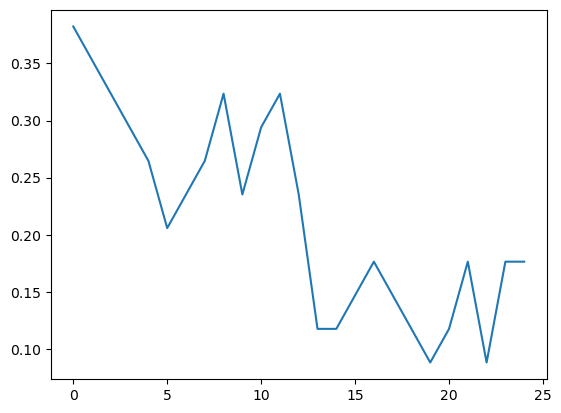

In [498]:
pivoted_taken = X_with_data.pivot_table(index = 'response', columns ='course_code', values = 'taken_course',aggfunc='mean').fillna(0)
R = pivoted_taken.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
accuracy = []

for ki in range(1,26):
    U, sigma, Vt = svds(pivoted_taken, k = ki)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
    preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivoted_taken.columns)
    preds_df['response'] = pivoted_taken.index
    preds_df = preds_df.set_index('response')
    preds = []
    taken = []
    next = []
    category = []
    wanted_in_rec = []
    for response in preds_df.index:
        already_taken, predictions = recommend_course(preds_df, response,X_with_data)
        preds.append(list(predictions.index))
        cat = []
        for pred in list(predictions.index):
            if pred in group1['course_code'].unique():
                cat.append(1)
            elif pred in group2['course_code'].unique():
                cat.append(2)
            else:
                cat.append(3)
        category.append(cat)
        taken.append(list(already_taken))
        next.append(course_survey_exploded.groupby('response').max().loc[response]['Q4'])
        if course_survey_exploded.groupby('response').max().loc[response]['Q4'] in list(predictions.index):
            wanted_in_rec.append(True)
        else:
            wanted_in_rec.append(False)
    X_full_taken = X_agg.copy(deep=True)
    X_full_taken['taken_courses'] = taken
    X_full_taken['recommended_courses'] = preds
    X_full_taken['next_wanted_course'] = next
    X_full_taken['category_recommended'] = category

    cat = []
    for i in range(0,len(X_full)):
        pred = X_full_taken['next_wanted_course'].iloc[i]
        if pred in group1['course_code'].unique():
            cat.append(1)
        elif pred in group2['course_code'].unique():
            cat.append(2)
        else:
            cat.append(3)
    X_full_taken['category_wanted'] = cat
    X_full_taken['predicted_in_next'] = wanted_in_rec
    accuracy.append(X_full_taken['predicted_in_next'].value_counts().loc[True]/len(X_full_taken))

plt.plot(accuracy)

In [501]:
R = pivoted_taken.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(pivoted_taken, k = 1)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivoted_taken.columns)
preds_df['response'] = pivoted_taken.index
preds_df = preds_df.set_index('response')
preds = []
taken = []
next = []
category = []
wanted_in_rec = []
for response in preds_df.index:
    already_taken, predictions = recommend_course(preds_df, response,X_with_data)
    preds.append(list(predictions.index))
    cat = []
    for pred in list(predictions.index):
        if pred in group1['course_code'].unique():
            cat.append(1)
        elif pred in group2['course_code'].unique():
            cat.append(2)
        else:
            cat.append(3)
    category.append(cat)
    taken.append(list(already_taken))
    next.append(course_survey_exploded.groupby('response').max().loc[response]['Q4'])
    if course_survey_exploded.groupby('response').max().loc[response]['Q4'] in list(predictions.index):
        wanted_in_rec.append(True)
    else:
        wanted_in_rec.append(False)
X_full_taken = X_agg.copy(deep=True)
X_full_taken['taken_courses'] = taken
X_full_taken['recommended_courses'] = preds
X_full_taken['next_wanted_course'] = next
X_full_taken['category_recommended'] = category

cat = []
for i in range(0,len(X_full_taken)):
    pred = X_full_taken['next_wanted_course'].iloc[i]
    if pred in group1['course_code'].unique():
        cat.append(1)
    elif pred in group2['course_code'].unique():
        cat.append(2)
    else:
        cat.append(3)
X_full_taken['category_wanted'] = cat
X_full_taken['predicted_in_next'] = wanted_in_rec

In [ ]:
X_full_taken.to_csv('recommended_courses_no_cluster.csv')

,response,age,birth_country,current_country,language,degree,current_industry,job_title,industry_switch,desired_career_title,num_omscs_taken,courses_taken,non_omscs_courses,course_same_time,email
0,1.0,30 - 39,china,singapore,english,Bachelor's Degree,Technology,software_engineer,Technology,NaN,4.0,"CS6350,CS6200,CS6601",2-3,1.0,na
1,2.0,30 - 39,USA,USA,Hindi,Bachelor's Degree,Technology,software_engineer,Technology,NaN,1.0,CS6601,2-3,1.0,NaN
2,3.0,18 - 29,China,China,Chinese,Master's Degree,Other,graduated student,Technology,CEO,1.0,CS6460,1,2.0,gliu359@gatech.edu
3,4.0,30 - 39,india,usa,hindi,Bachelor's Degree,Engineering,manager,Engineering,Director,4.0,"CS6750,CS6460",10,0.0,na
4,5.0,18 - 29,America,America,English,Bachelor's Degree,Engineering,Data Analyst,Engineering,NaN,2.0,"CS6750,C6300",2-3,1.0,NaN
